Datos:
- Dataset: kc_house_data.csv
- Preprocesamiento requerido: Eliminar las columnas 'id' y 'date' por ser irrelevantes para la predicción

Requisitos del modelo:
1. Tipo de modelo: Regresión (predicción de valores continuos)
2. Estructura:
   - Utilizar entre 1 y 2 capas ocultas (se recomienda empezar con 1)
   - La primera capa oculta debe tener más neuronas que variables de entrada
   - Si se usa segunda capa, debe tener menos neuronas que la primera
   - Capa de salida: 1 neurona (precio a predecir)

Criterios de éxito:
- El error (MAE) debe reducirse desde aproximadamente 600,000 dólares hasta menos de 80,000 dólares
- El modelo debe ser capaz de generalizar bien con datos nuevos

Consideraciones adicionales:
- Se permite experimentar con diferentes números de neuronas
- Se puede ajustar el número de épocas de entrenamiento
- Se recomienda empezar con una sola capa oculta para simplificar el proceso

In [119]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout

In [120]:
df = pd.read_csv('./kc_house_data.csv')

In [121]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [122]:
df["date"].head(3)

0    20141013T000000
1    20141209T000000
2    20150225T000000
Name: date, dtype: object

In [123]:
df = df.drop(['id', 'date'], axis=1)

In [43]:
# df["date"].head(3)

In [124]:
X = df.drop('price', axis=1)
y = df['price']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [127]:
n_features = X_train.shape[1]
print(f"El número de características es: {n_features}")

El número de características es: 18


In [57]:
modelo = Sequential([
    Dense(n_features*2, activation='relu', input_shape=(n_features,)),  # Primera capa con el doble de neuronas
    Dense(1)  # Capa de salida
])

C:\Users\34665\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
modelo.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [61]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 36)                  │             684 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              37 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 721 (2.82 KB)

 Trainable params: 721 (2.82 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
history = modelo.fit(
    X_train_scaled, 
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 427440799744.0000 - mae: 539090.7500 - val_loss: 397914308608.0000 - val_mae: 534604.5000
Epoch 2/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 418667495424.0000 - mae: 536669.6250 - val_loss: 397742407680.0000 - val_mae: 534496.4375
Epoch 3/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 433198923776.0000 - mae: 541259.2500 - val_loss: 397468532736.0000 - val_mae: 534324.8750
Epoch 4/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 421105139712.0000 - mae: 536514.6875 - val_loss: 397089472512.0000 - val_mae: 534089.6875
Epoch 5/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 413643440128.0000 - mae: 532662.5625 - val_loss: 396626984960.0000 - val_mae: 533803.4375
Epoch 6/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 413087170560.0000 - mae: 533818.8125 - val_loss: 396084871168.0000 - val_mae: 533468.3750
Epoch 7/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 428822265856.0000 - mae: 537873

In [67]:
error = modelo.evaluate(X_test_scaled, y_test)[1]  # MAE
print(f"Para la evaluación del modelo calculamos el Error de predicción: ${error:,.2f}")

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 219458912256.0000 - mae: 380098.5000
Para la evaluación del modelo calculamos el Error de predicción: $377,244.47


In [ ]:
# Como podemos ver no es muy buen resultado ya que el objetivo del ejercicio es conseguir un error inferior a $80,000
# y estamos obteniendo$377,244.47. Así que decidimos replantear el modelo. Vamos a subir las subir el número de neuronas y el número de épocas

In [69]:
modelo = Sequential([
    Dense(n_features**2, activation='relu', input_shape=(n_features,)),
    Dense(1)
])

C:\Users\34665\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
modelo.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [73]:
history = modelo.fit(
    X_train_scaled, 
    y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32
)

Epoch 1/200
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 426639228928.0000 - mae: 539067.3750 - val_loss: 397551796224.0000 - val_mae: 534349.7500
Epoch 2/200
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 424020115456.0000 - mae: 534537.3125 - val_loss: 395961303040.0000 - val_mae: 533252.0625
Epoch 3/200
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 414439538688.0000 - mae: 533964.8750 - val_loss: 393426305024.0000 - val_mae: 531495.0625
Epoch 4/200
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 423874297856.0000 - mae: 536316.8125 - val_loss: 390093111296.0000 - val_mae: 529182.7500
Epoch 5/200
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 422130155520.0000 - mae: 532360.5625 - val_loss: 386033057792.0000 - val_mae: 526352.1250
Epoch 6/200
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 402109071360.0000 - mae: 525939.7500 - val_loss: 381325606912.0000 - val_mae: 523054.3438
Epoch 7/200
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 414139285504.0000 - mae: 528345.9

In [77]:
error = modelo.evaluate(X_test_scaled, y_test)[1]  # MAE
print(f"Para la evaluación del modelo calculamos el Error de predicción: ${error:,.2f}")

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 41110949888.0000 - mae: 127543.1562
Para la evaluación del modelo calculamos el Error de predicción: $125,468.73


In [ ]:
# Aún con este cambio no es suficiente, vamos a hacer ahora lo siguiente:
# - Primera capa con 4 veces el número de características
# - Segunda capa con 2 veces el número de características
# Ambas capas con activación ReLU
# Mayor número de épocas (500 en lugar de 200)

In [79]:
modelo = Sequential([
    Dense(n_features*4, activation='relu', input_shape=(n_features,)),
    Dense(n_features*2, activation='relu'),
    Dense(1)
])

C:\Users\34665\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [81]:
modelo.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [83]:
history = modelo.fit(
    X_train_scaled, 
    y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
)

Epoch 1/500
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 422132088832.0000 - mae: 539873.1250 - val_loss: 395618025472.0000 - val_mae: 532959.7500
Epoch 2/500
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 418746204160.0000 - mae: 539405.2500 - val_loss: 378591838208.0000 - val_mae: 520953.0000
Epoch 3/500
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 414884823040.0000 - mae: 523989.3125 - val_loss: 339138740224.0000 - val_mae: 492015.8125
Epoch 4/500
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 353438662656.0000 - mae: 484944.0000 - val_loss: 279440556032.0000 - val_mae: 443964.2500
Epoch 5/500
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 271973416960.0000 - mae: 429354.2188 - val_loss: 209914216448.0000 - val_mae: 378476.8750
Epoch 6/500
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 213502066688.0000 - mae: 365192.6250 - val_loss: 147889995776.0000 - val_mae: 305472.7500
Epoch 7/500
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 151283154944.0000 - mae: 293025.2

In [85]:
error = modelo.evaluate(X_test_scaled, y_test)[1]  # MAE
print(f"Para la evaluación del modelo calculamos el Error de predicción: ${error:,.2f}")

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 30449451008.0000 - mae: 105196.9219
Para la evaluación del modelo calculamos el Error de predicción: $102,649.00


In [ ]:
# Aún  el error de predicción es alto vamos a:
# - Añadir regularización para evitar overfitting
# - Primera capa con 8 veces el número de características
# - Segunda capa con 4 veces el número de características

In [114]:
modelo = Sequential([
    Dense(n_features*8, activation='relu', input_shape=(n_features,)),
    Dropout(0.2),
    Dense(n_features*4, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

C:\Users\34665\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [116]:
modelo.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [ ]:
# También vamos a cambiar las epochs y el batch_size

In [137]:
history = modelo.fit(
    X_train_scaled, 
    y_train,
    validation_split=0.2,
    epochs=2000,
    batch_size=500,
    verbose=0
)

In [139]:
error = modelo.evaluate(X_test_scaled, y_test)[1]  # MAE
print(f"Para la evaluación del modelo calculamos el Error de predicción: ${error:,.2f}")

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 28777838592.0000 - mae: 100626.7109
Para la evaluación del modelo calculamos el Error de predicción: $98,203.58


In [ ]:
# Estamos ya cerca del resultado esperado, vamos probar a añadir una capa más y aumentar el número de neuronas

In [141]:
modelo = Sequential([
    Dense(n_features*16, activation='relu', input_shape=(n_features,)),
    Dropout(0.3),
    Dense(n_features*8, activation='relu'),
    Dropout(0.2),
    Dense(n_features*4, activation='relu'),
    Dropout(0.1),
    Dense(1)
])

C:\Users\34665\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [143]:
modelo.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [145]:
history = modelo.fit(
    X_train_scaled, 
    y_train,
    validation_split=0.2,
    epochs=2000,
    batch_size=200,
    verbose=0
)

In [147]:
error = modelo.evaluate(X_test_scaled, y_test)[1]  # MAE
print(f"Para la evaluación del modelo calculamos el Error de predicción: ${error:,.2f}")

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 17364205568.0000 - mae: 74243.8594
Para la evaluación del modelo calculamos el Error de predicción: $73,799.89


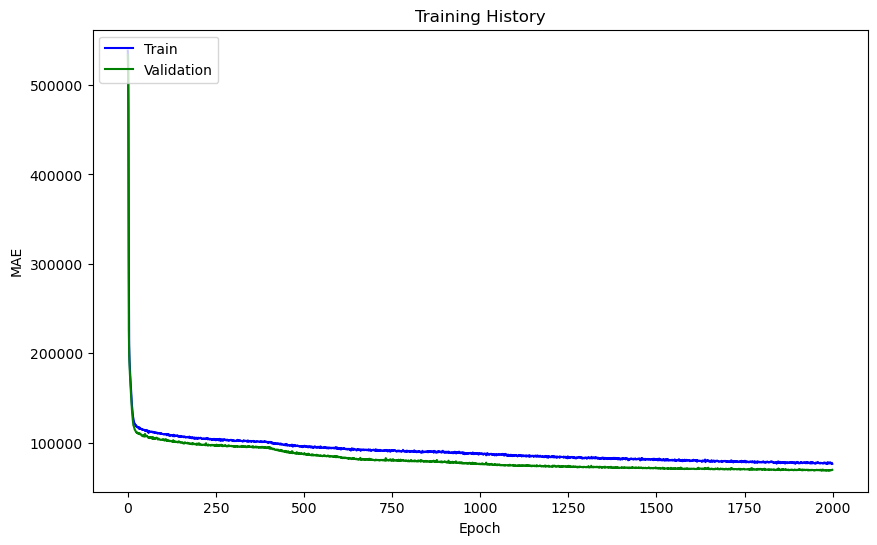

MAE final entrenamiento: $76,485.28
MAE final validación: $69,691.67


In [153]:

plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], c='b', label='Train')
plt.plot(history.history['val_mae'], c='g', label='Validation')
plt.title('Training History')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

print(f"MAE final entrenamiento: ${history.history['mae'][-1]:,.2f}")
print(f"MAE final validación: ${history.history['val_mae'][-1]:,.2f}")